In [2]:
import numpy as np

data = np.load('./philosophy_embeddings_merged.npz', allow_pickle=True)
embeddings = data['embeddings']
metadata = data['metadata']

print(f'Embeddings shape: {embeddings.shape}')
print(f'Metadata items: {len(metadata)}')


Embeddings shape: (360808, 384)
Metadata items: 360808


In [3]:
import numpy as np

data1 = np.load('./religion_embeddings_merged.npz', allow_pickle=True)
embeddings1 = data1['embeddings']
metadata1 = data1['metadata']

print(f'Embeddings shape: {embeddings1.shape}')
print(f'Metadata items: {len(metadata1)}')


Embeddings shape: (161355, 384)
Metadata items: 161355


In [4]:
from collections import defaultdict

# Combine embeddings and metadata into a single list
philosophy_data = [{'embedding': e, **m} for e, m in zip(embeddings, metadata)]
religion_data   = [{'embedding': e, **m} for e, m in zip(embeddings1, metadata1)]

# Group by tag
def group_embeddings_by_tag(data, tag_field):
    groups = defaultdict(list)
    for item in data:
        tag = item[tag_field]
        groups[tag].append(item['embedding'])
    return groups

philosophy_groups = group_embeddings_by_tag(philosophy_data, 'school')
religion_groups = group_embeddings_by_tag(religion_data, 'school')

def average_embeddings(group_dict):
    return {k: np.mean(v, axis=0) for k, v in group_dict.items()}

avg_philosophy = average_embeddings(philosophy_groups)
avg_religion = average_embeddings(religion_groups)

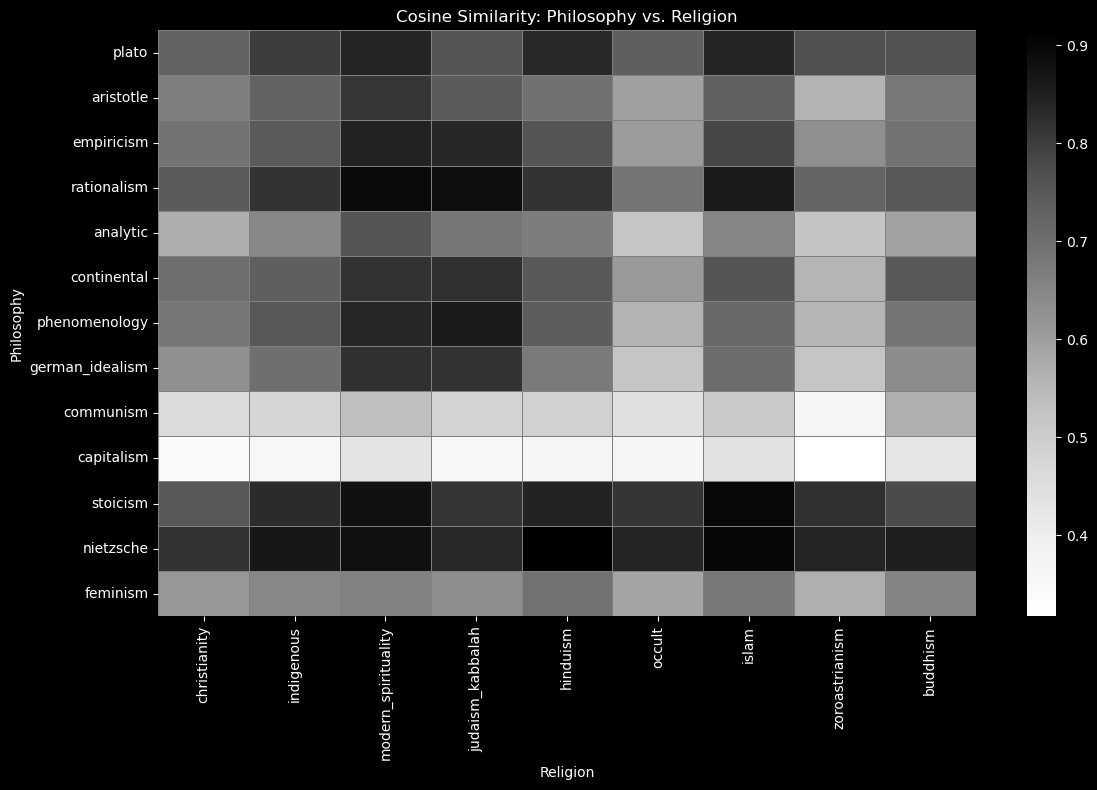

Top philosophical matches for each religion:

christianity: closest to nietzsche (score=0.815)
indigenous: closest to nietzsche (score=0.867)
modern_spirituality: closest to rationalism (score=0.894)
judaism_kabbalah: closest to rationalism (score=0.885)
hinduism: closest to nietzsche (score=0.915)
occult: closest to nietzsche (score=0.841)
islam: closest to nietzsche (score=0.899)
zoroastrianism: closest to nietzsche (score=0.841)
buddhism: closest to nietzsche (score=0.851)


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Prepare matrices
philosophy_labels = list(avg_philosophy.keys())
religion_labels = list(avg_religion.keys())

philosophy_matrix = np.array([avg_philosophy[k] for k in philosophy_labels])
religion_matrix = np.array([avg_religion[k] for k in religion_labels])

# Compute cosine similarities
similarity_matrix = cosine_similarity(philosophy_matrix, religion_matrix)

# Convert to DataFrame
df_similarity = pd.DataFrame(similarity_matrix, index=philosophy_labels, columns=religion_labels)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(
    df_similarity, 
    annot=False,               # show numbers
    fmt=".2f",                # format to 2 decimals
    cmap="Greys",             # grayscale colormap (white = high sim)
    cbar=True, 
    linewidths=0.5, 
    linecolor='gray', 
    annot_kws={"color": "white"}  # make numbers white
)
plt.title("Cosine Similarity: Philosophy vs. Religion")
plt.ylabel("Philosophy")
plt.xlabel("Religion")
plt.tight_layout()
plt.show()

print("Top philosophical matches for each religion:\n")
for religion in df_similarity.columns:
    top_philosophy = df_similarity[religion].idxmax()
    score = df_similarity[religion].max()
    print(f"{religion}: closest to {top_philosophy} (score={score:.3f})")


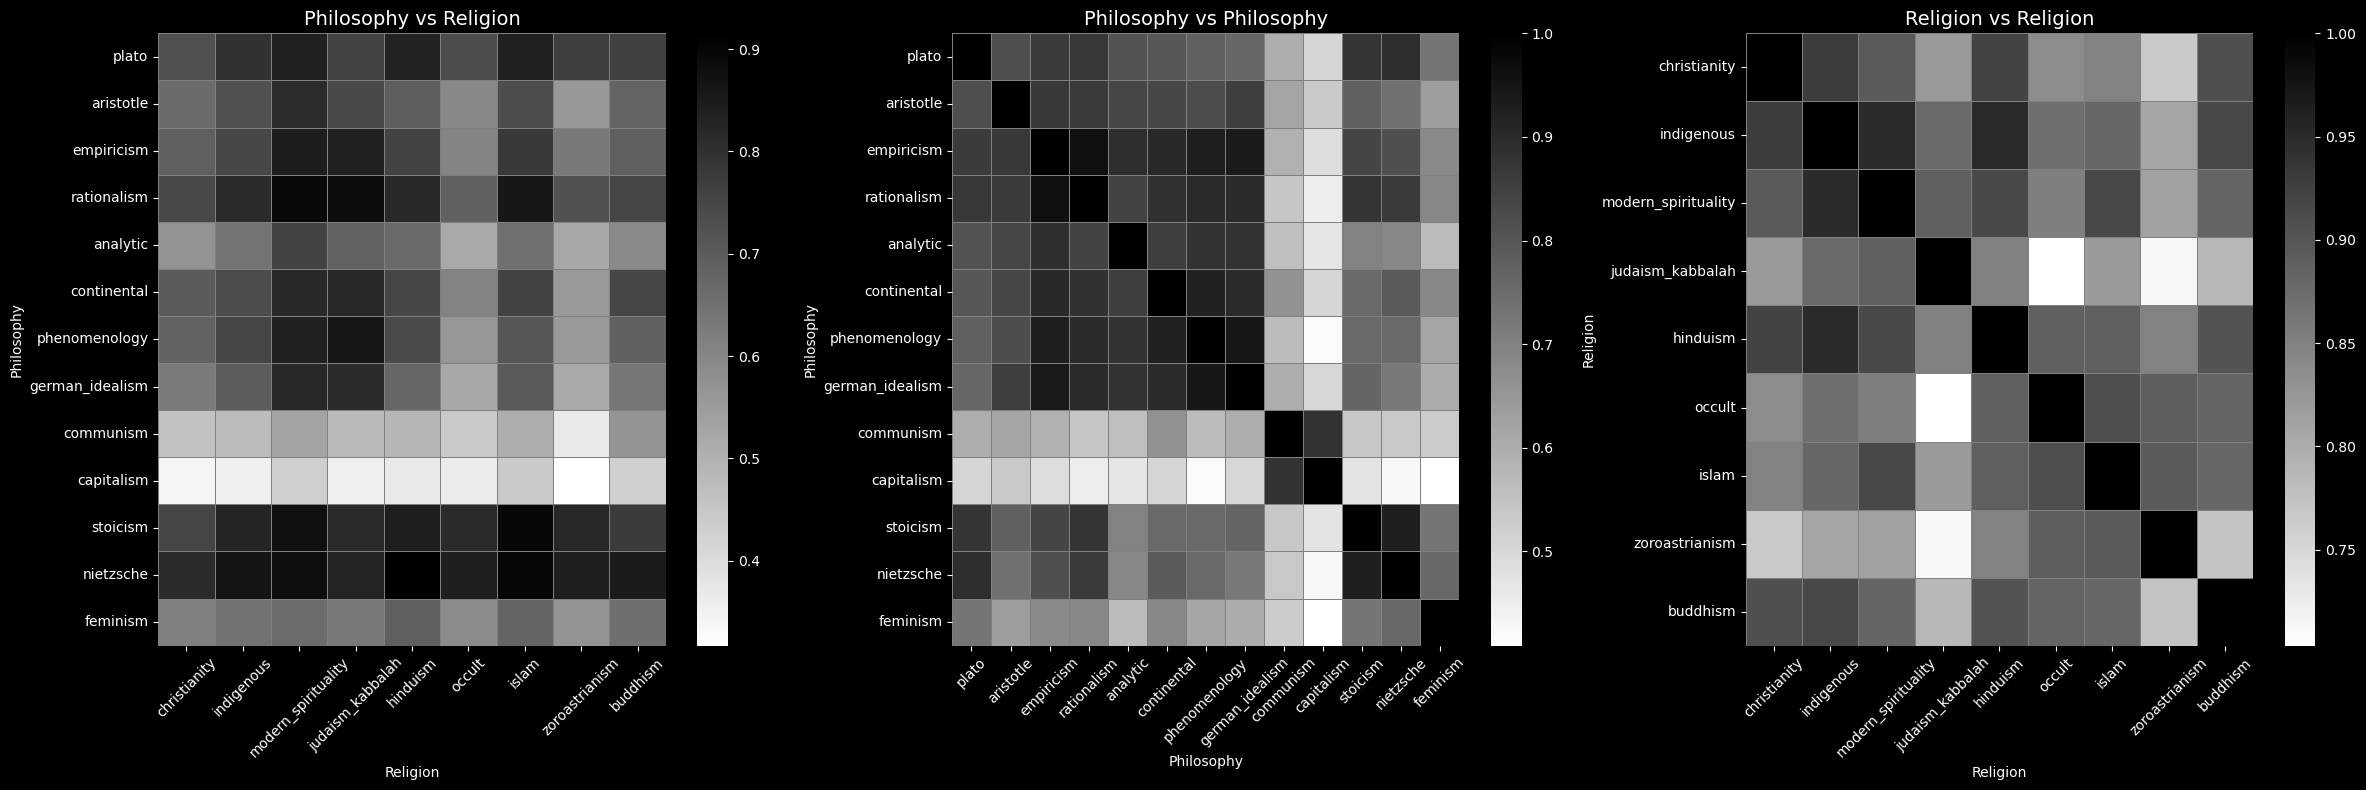

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Average group vectors again if needed
avg_philosophy = {k: np.mean(v, axis=0) for k, v in philosophy_groups.items()}
avg_religion   = {k: np.mean(v, axis=0) for k, v in religion_groups.items()}

# Labels and vectors
philosophy_labels = list(avg_philosophy.keys())
religion_labels = list(avg_religion.keys())

philosophy_matrix = np.array([avg_philosophy[k] for k in philosophy_labels])
religion_matrix   = np.array([avg_religion[k] for k in religion_labels])

# Compute all pairwise similarities
sim_phil_vs_reli = cosine_similarity(philosophy_matrix, religion_matrix)
sim_phil_vs_phil = cosine_similarity(philosophy_matrix)
sim_reli_vs_reli = cosine_similarity(religion_matrix)

# Convert to DataFrames
df_phil_vs_reli = pd.DataFrame(sim_phil_vs_reli, index=philosophy_labels, columns=religion_labels)
df_phil_vs_phil = pd.DataFrame(sim_phil_vs_phil, index=philosophy_labels, columns=philosophy_labels)
df_reli_vs_reli = pd.DataFrame(sim_reli_vs_reli, index=religion_labels, columns=religion_labels) 


# ---------------------
# Plot All in Subplots
# ---------------------
plt.style.use('dark_background')
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Use reversed grayscale so that high values are darker
colormap = "gray_r"

# 1. Philosophy vs Religion
sns.heatmap(df_phil_vs_reli, annot=False, fmt=".2f", cmap=colormap, ax=axs[0],
            cbar=True, linewidths=0.5, linecolor='gray',
            annot_kws={"color": "white"})
axs[0].set_title("Philosophy vs Religion", color='white', fontsize=14)
axs[0].set_xlabel("Religion", color='white')
axs[0].set_ylabel("Philosophy", color='white')
axs[0].tick_params(axis='x', colors='white', rotation=45)
axs[0].tick_params(axis='y', colors='white')

# 2. Philosophy vs Philosophy
sns.heatmap(df_phil_vs_phil, annot=False, fmt=".2f", cmap=colormap, ax=axs[1],
            cbar=True, linewidths=0.5, linecolor='gray',
            annot_kws={"color": "white"})
axs[1].set_title("Philosophy vs Philosophy", color='white', fontsize=14)
axs[1].set_xlabel("Philosophy", color='white')
axs[1].set_ylabel("Philosophy", color='white')
axs[1].tick_params(axis='x', colors='white', rotation=45)
axs[1].tick_params(axis='y', colors='white') 

# 3. Religion vs Religion
sns.heatmap(df_reli_vs_reli, annot=False, fmt=".2f", cmap=colormap, ax=axs[2],
            cbar=True, linewidths=0.5, linecolor='gray',
            annot_kws={"color": "white"})
axs[2].set_title("Religion vs Religion", color='white', fontsize=14)
axs[2].set_xlabel("Religion", color='white')
axs[2].set_ylabel("Religion", color='white')
axs[2].tick_params(axis='x', colors='white', rotation=45)
axs[2].tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()



In [13]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

print(f'Reduced embeddings shape: {embedding_2d.shape}')


/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
python(44435) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Reduced embeddings shape: (360808, 2)


['title', 'author', 'school', 'sentence_str']


/var/folders/vw/gq8nz2cx3kx401ysxmns_yrc0000gn/T/ipykernel_42966/2513093516.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(schools))


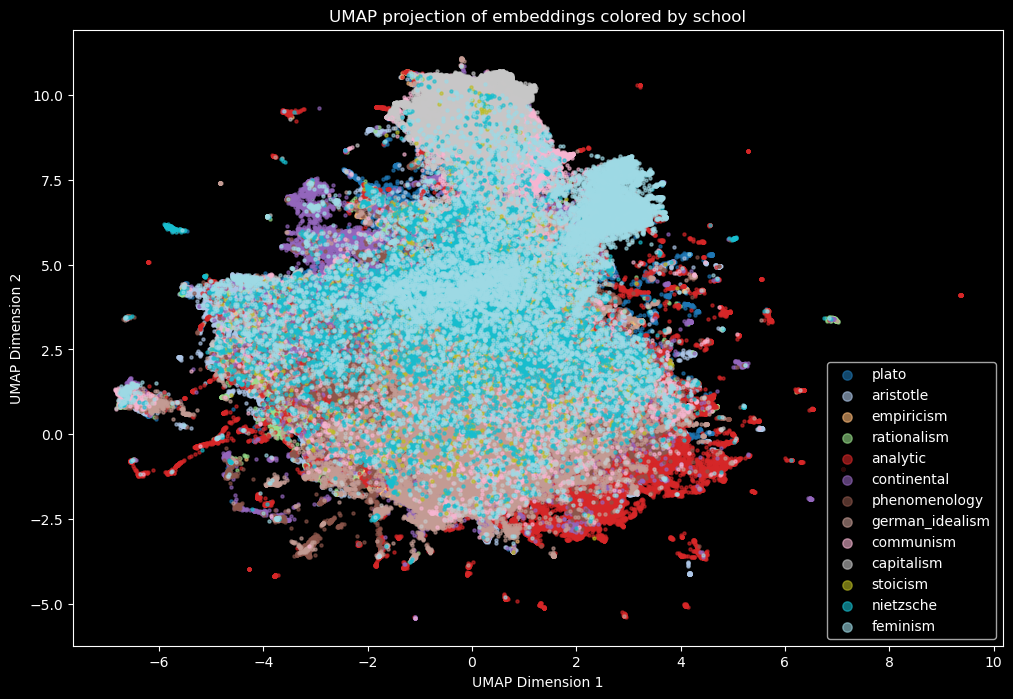

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
python(44908) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
python(44909) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has

Adjusted Rand Index (ARI): -0.004
Normalized Mutual Info (NMI): 0.154


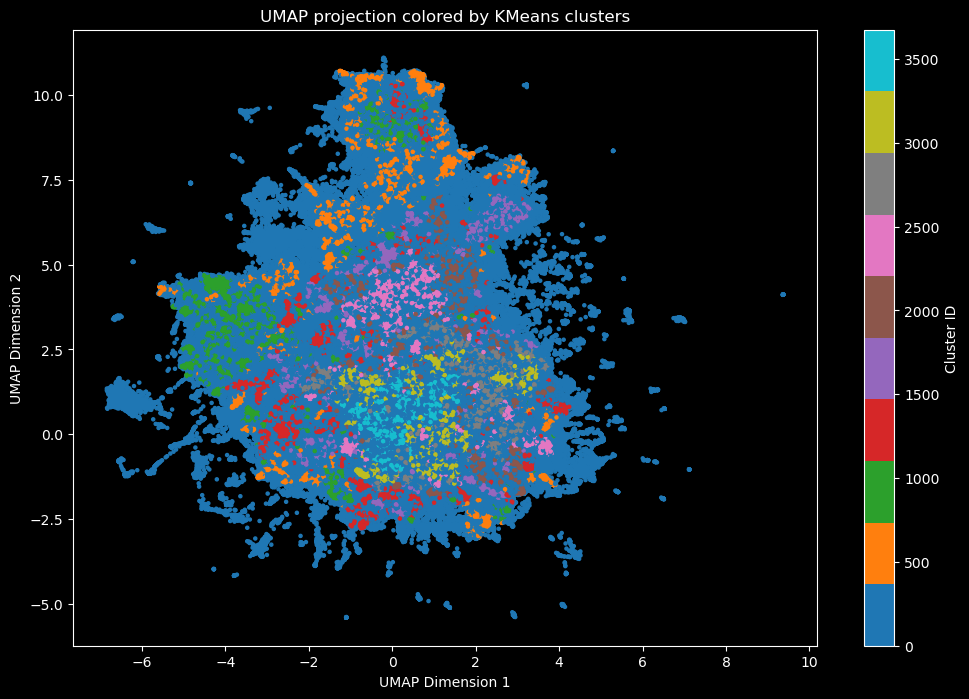

In [22]:
import pandas as pd

df_meta = pd.json_normalize(metadata)
print(df_meta.columns.tolist())



# Plot
plt.figure(figsize=(12, 8))
schools = df_meta['school'].unique()
colors = plt.cm.get_cmap('tab20', len(schools))

for i, school in enumerate(schools):
    idx = df_meta['school'] == school
    plt.scatter(embedding_2d[idx, 0], embedding_2d[idx, 1], s=5, color=colors(i), label=school, alpha=0.6)

plt.legend(markerscale=3)
plt.title('UMAP projection of embeddings colored by school')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(embedding_2d)


# Compare to ground truth
ari = adjusted_rand_score(df_meta['school'], cluster_labels)
nmi = normalized_mutual_info_score(df_meta['school'], cluster_labels)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Info (NMI): {nmi:.3f}")
plt.figure(figsize=(12, 8))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=cluster_labels, cmap='tab10', s=5)
plt.title('UMAP projection colored by KMeans clusters')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar(label='Cluster ID')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
python(44561) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(44562) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(44563) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(44564) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(44565) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


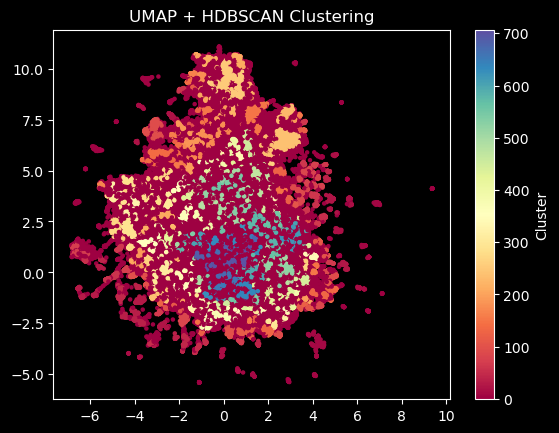

In [15]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=30, metric='euclidean')
labels = clusterer.fit_predict(embedding_2d)

plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=labels, cmap='Spectral', s=5)
plt.title("UMAP + HDBSCAN Clustering")
plt.colorbar(label="Cluster")
plt.show()


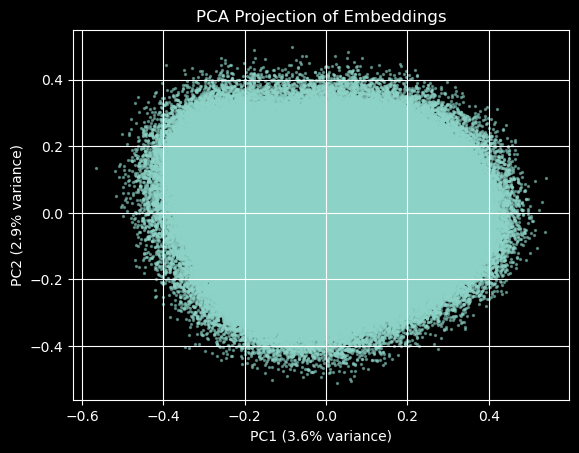

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(embeddings)

plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], s=2, alpha=0.5)
plt.title("PCA Projection of Embeddings")
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.grid(True)
plt.show()


In [19]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Load model, FAISS index, and metadata
model = SentenceTransformer("all-MiniLM-L6-v2")
index = faiss.read_index("philosophy_faiss.index")
data = np.load("philosophy_embeddings_merged.npz", allow_pickle=True)
metadata = data['metadata']
embeddings = data['embeddings']

# Encode query
query = "I think my friend is a good person, but I don't know if I want to be friends, because he is very not mature, and holding me down."
query_vec = model.encode([query], normalize_embeddings=True).astype('float32')

# Search top k
k = 8
D, I = index.search(query_vec, k)

# Format context
results = []
for idx in I[0]:
    m = metadata[idx]
    school = m.get('school', 'Unknown School')
    author = m.get('author', 'Unknown Author')
    sentence = m.get('sentence_str', 'No sentence available')
    results.append(f"{school} - {author}: {sentence}")

context = "\n".join(results)

print("Most relevant retrieved sentences:")
print(context)



Most relevant retrieved sentences:
aristotle - Aristotle: He must also be not merely good absolutely but good for you, if the friend is to be a friend to you.
aristotle - Aristotle: But the good may also be a friend to the bad; for it may be that he is a friend in so far as he is pleasant.
aristotle - Aristotle: Will the good man then be a friend to the good, or will he not?
plato - Plato: But then is the good a friend?' '
aristotle - Aristotle: But the man that is good absolutely, seeks to be a friend to himself, as has been said, since he has within him two parts which by nature desire to be friends and which it is impossible to tear apart.
plato - Plato: When questioned, he said that friendship is always good and never bad.
aristotle - Aristotle: For if the friend is also good, there is perhaps no great difficulty, if one does not exaggerate the one quality and minimize the other, making him very much of a friend, but not much of a good man.
plato - Plato: since good people are so m

In [18]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Load model, FAISS index, and metadata
model = SentenceTransformer("all-MiniLM-L6-v2")
index = faiss.read_index("religion_faiss.index")
data = np.load("religion_embeddings_merged.npz", allow_pickle=True)
metadata = data['metadata']
embeddings = data['embeddings']

# Encode query
query = "I think my friend is a good person, but I don't know if I want to be friends, because he is very not mature, and holding me down."
query_vec = model.encode([query], normalize_embeddings=True).astype('float32')

# Search top k
k = 8
D, I = index.search(query_vec, k)

# Format context
results = []
for idx in I[0]:
    m = metadata[idx]
    school = m.get('school', 'Unknown School')
    sentence = m.get('sentence_str', 'No sentence available')
    results.append(f"{school}: {sentence}")

context = "\n".join(results)

print("Most relevant retrieved sentences:")
print(context)



Most relevant retrieved sentences:
modern_spirituality: What avail friends, but to bar his way?
indigenous: You may live in intimate friendship with an initiate, and yet a gap severs you from his essential self, so long as you have not become an initiate yourself.
hinduism: how does one bind friends (to himself)?
buddhism: He befriends those who seek his friendship and loves those who.
hinduism: He who transgresses and despises modesty, who says, 'I am a friend,' but does not undertake any work that can be done, know (about) him: 'he is not my (friend).'.
hinduism: Be not a friend of the world.
modern_spirituality: If you can find a dutiful friend to go with you, a righteous and prudent man not caring for hardships, go with him deliberately.
hinduism: Do not have evil doers for friends, do not have low people for friends: have virtuous people for friends, have for friends the best of men.


In [44]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
from collections import defaultdict

# Load model, FAISS index, and metadata
model = SentenceTransformer("all-MiniLM-L6-v2")
index = faiss.read_index("philosophy_faiss.index")
data = np.load("philosophy_embeddings_merged.npz", allow_pickle=True)
metadata = data['metadata']
embeddings = data['embeddings']

# Encode query
query = "Is there a good reason to be friends with someone who is not mature?"
query_vec = model.encode([query], normalize_embeddings=True).astype('float32')

# Search top-k (larger than needed to allow filtering)
k = 3000
D, I = index.search(query_vec, k)  # D = distances, I = indices

# Group results by school
school_hits = defaultdict(list)
for dist, idx in zip(D[0], I[0]):
    m = metadata[idx]
    school = m.get('school', 'Unknown School')
    author = m.get('author', 'Unknown Author')
    book = m.get('title', 'Unknown Book')
    sentence = m.get('sentence_str', 'No sentence available')
    
    similarity = 1 - dist  # because FAISS index uses L2 or dot product, not similarity directly
    
    if similarity < 0.3:
        continue  # skip low-relevance sentences
    
    if len(school_hits[school]) < 2:
        school_hits[school].append((similarity, f"{school} - {author} : '{sentence}'({book})"))

# Ensure at least one entry per school
all_schools = sorted(set(m.get('school', 'Unknown School') for m in metadata))
results = []

for school in all_schools:
    if school in school_hits:
        # Add up to 2 results, sorted by similarity
        sorted_hits = sorted(school_hits[school], reverse=True)[:2]
        results.extend([hit[1] for hit in sorted_hits])
    else:
        results.append(f"{school}: no_mention")

# Show final context
context = "\n".join(results)
print("Most relevant sentences by school:")
print(context)


Most relevant sentences by school:
analytic - Russell : 'Thus, acquaintance with a thing does not involve knowledge of its 'nature' in the above sense.'(The Problems Of Philosophy)
analytic - Lewis : 'At age he is still somewhat interested in fulfilling the ambitions he held at age but at age he cares nothing for those ambitions, and it is beginning to take an effort of will to summon up an interest in fulfilling his aspirations at age.'(Lewis - Papers)
aristotle - Aristotle : 'Many questions are raised about friendship.'(Aristotle - Complete Works)
aristotle - Aristotle : 'On the other hand the friendship of young people seems to aim at pleasure; for they live under the guidance of emotion, and pursue above all what is pleasant to themselves and what is immediately before them; but with increasing age their pleasures become different.'(Aristotle - Complete Works)
capitalism - Keynes : 'But in the long run is there not some simpler relationship?'(A General Theory Of Employment, Interes

other options

In [42]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
from collections import defaultdict

# Load model, FAISS index, and metadata
model = SentenceTransformer("all-MiniLM-L6-v2")
index = faiss.read_index("philosophy_faiss.index")
data = np.load("philosophy_embeddings_merged.npz", allow_pickle=True)
metadata = data['metadata']
embeddings = data['embeddings']

# Encode query
query = "Is there a good reason to be friends with someone who is not mature?"
query_vec = model.encode([query], normalize_embeddings=True).astype('float32')

# Search top-k (larger than needed to allow filtering)
k = 3000
D, I = index.search(query_vec, k)  # D = distances, I = indices

# Group results by school and track top global
school_hits = defaultdict(list)
global_hits = []

for dist, idx in zip(D[0], I[0]):
    m = metadata[idx]
    school = m.get('school', 'Unknown School')
    author = m.get('author', 'Unknown Author')
    book = m.get('book_title', 'Unknown Book')
    sentence = m.get('sentence_str', 'No sentence available')
    
    similarity = 1 - dist  # if FAISS uses inner product
    
    if similarity < 0.3:
        continue  # skip low-relevance sentences

    formatted = f"[{similarity:.3f}] {school} - {author} ({book}): {sentence}"
    global_hits.append((similarity, formatted))

    if len(school_hits[school]) < 2:
        school_hits[school].append((similarity, formatted))

# Sort and get top 3 global
top_3_global = sorted(global_hits, reverse=True)[:3]

# Ensure at least one entry per school
all_schools = sorted(set(m.get('school', 'Unknown School') for m in metadata))
per_school_results = []

for school in all_schools:
    if school in school_hits:
        sorted_hits = sorted(school_hits[school], reverse=True)[:2]
        per_school_results.extend([hit[1] for hit in sorted_hits])
    else:
        per_school_results.append(f"{school}: no_mention")

# Final output
print("🔝 Top 3 Most Relevant Sentences Globally:\n")
for s in top_3_global:
    print(s[1])

print("\n🏛️ Most Relevant Sentences by School:\n")
for s in per_school_results:
    print(s)


🔝 Top 3 Most Relevant Sentences Globally:

[0.787] plato - Plato (Unknown Book): The other sort has been around a lot of discussions, and so by temperament
[0.787] feminism - Wollstonecraft (Unknown Book): Is it not very reasonable, therefore, she should cultivate both?
[0.787] aristotle - Aristotle (Unknown Book): Some, again, think that we only regard the useful as a friend, their proof being that all pursue the useful, but the useless, even in themselves, they throw away (as old Socrates said, citing the case of our spittle, hairs, and nails), and that we cast off useless parts, and in the end at death our very body, the corpse being useless; but those who have a use for it keep it, as in Egypt

🏛️ Most Relevant Sentences by School:

[0.666] analytic - Russell (Unknown Book): Thus, acquaintance with a thing does not involve knowledge of its 'nature' in the above sense.
[0.631] analytic - Lewis (Unknown Book): At age he is still somewhat interested in fulfilling the ambitions he held

In [2]:
import numpy as np
import faiss
from sentence_transformers import SentenceTransformer
import pandas as pd

# === CONFIG ===
MODEL_NAME = "intfloat/e5-large-v2"
CSV_PATH = "philosophy_data.csv"
INDEX_PATH = "philosophy_faiss.index"
NPZ_PATH = "philosophy_embeddings_merged.npz"

# === LOAD ===
df = pd.read_csv(CSV_PATH)
model = SentenceTransformer(MODEL_NAME)
index = faiss.read_index(INDEX_PATH)
npz = np.load(NPZ_PATH, allow_pickle=True)
metadata = npz["metadata"]
embeddings = npz["embeddings"]  # Optional: for manual sim checks

# === PICK A SENTENCE ===
i = 1234
target_sentence = df.iloc[i]["sentence_str"]

# === ENCODE QUERY ===
query = "query: " + target_sentence
query_vec = model.encode([query], normalize_embeddings=True).astype("float32")

# === SEARCH ===
D, I = index.search(query_vec, 5)

print("Original sentence index:", i)
print("Query sentence:", target_sentence)
print("\nTop 5 matches:")
for rank, idx in enumerate(I[0]):
    matched_sentence = metadata[idx]['sentence_str']
    similarity = 1 - D[0][rank]
    print(f"{rank+1}. idx={idx} | sim={similarity:.4f} | \"{matched_sentence[:100]}...\"")


Original sentence index: 1234
Query sentence: What about the following, Simmias?

Top 5 matches:
1. idx=1234 | sim=0.0291 | "What about the following, Simmias?..."
2. idx=1728 | sim=0.0736 | "What of this, Simmias?..."
3. idx=1705 | sim=0.1222 | "Are these the questions, Simmias and Cebes, which we must investigate?..."
4. idx=1439 | sim=0.1225 | "Which alternative do you choose, Simmias?..."
5. idx=1392 | sim=0.1240 | "Or seeing a picture of Simmias, recollect Simmias himself?..."
